# BEST NEIGHBORHOOD IN PITTSBURGH  
**Team: The Code Warriors**

## Introduction

In this project, we set out to answer the question: **What is the best neighborhood in Pittsburgh for families?** We used real data from WPRDC to compare different neighborhoods and figure out which one is the most family-friendly.

We looked at three things that are important to families:
- **Low crime rates** (safer neighborhoods)
- **High public school enrollment** (shows schools are available and families live there)
- **Low vacancy rates** (fewer empty homes means a more stable and active community)

We picked these because they are easy to measure, and they give a good idea of what living in a neighborhood might be like for a family. For each neighborhood, we gave a score for each of the three factors, then averaged them to find the overall best neighborhood.

At first, we thought about using other data, like air quality, parks, or commute times. But we decided to focus on crime, school enrollment, and vacancy rates because:
1. The data was easy to find and clean  
2. These things are important to families  
3. They were simple to compare across neighborhoods

This project gave us the chance to use data to make real decisions, just like in the real world. We also learned how different types of information can help us understand what makes a neighborhood a good place to live.

## The Metric

To figure out the best neighborhood in Pittsburgh for families, we created a score based on three things that are important for family life: safety, schools, and housing stability. Each of these is measured using public data from different sources. We gave each neighborhood a score for each category, then averaged them to find the overall best one.

Here are the metrics we used and the data we worked with:

### 1. Crime Rate (Safety)
- **What we measured:** The number of police-reported incidents in each neighborhood.
- **Why it matters:** A lower crime rate means a safer place to live.
- **Dataset Used:** Police Incident Blotter  
- **Description:** Contains detailed records of police-reported incidents in Pittsburgh, including dates, locations, and types of offenses.
- **Link:** [Police Incident Blotter](https://data.wprdc.org/dataset/uniform-crime-reporting-data/resource/044f2016-1dfd-4ab0-bc1e-065da05fca2e)

### 2. School Enrollment (Education Access)
- **What we measured:** The total number of students enrolled in public schools per neighborhood.
- **Why it matters:** More students often means stronger school presence and access for families.
- **Dataset Used:** Pittsburgh Public Schools Enrollment by Neighborhood, School, and Feeder Pattern  
- **Description:** Shows enrollment numbers by neighborhood and school. Used to identify areas with higher school engagement and access.
- **Link:** [School Enrollment Data](https://data.wprdc.org/dataset/pittsburgh-public-schools-enrollment/resource/cbf270fd-891e-49bb-98fb-d6d52c260847)

### 3. Vacancy Rate (Housing Stability)
- **What we measured:** The percentage of vacant homes in each neighborhood.
- **Why it matters:** A lower vacancy rate usually means the area is more stable and has more long-term residents.
- **Dataset Used:** Pittsburgh Neighborhood Profiles  
- **Description:** Includes detailed demographic, economic, and housing data by neighborhood. Used to assess neighborhood stability via vacancy rate.
- **Link:** [Neighborhood Profiles](https://data.wprdc.org/dataset/ucsur_neighborhoodprofiles_2024/resource/a2d6468e-0229-4c6a-92c5-10814092e580)

### How We Determined the Best Neighborhood

After calculating scores for crime, school enrollment, and vacancy rate, we normalized each metric to a scale of 0 to 1 using the following general formula:

score = (value - min) / (max - min)

For metrics where **lower is better** (like crime and vacancy), we adjusted it like this:  

score = 1 - (value - min) / (max - min)

This ensured all three metrics were scored consistently, where **1 is best** and **0 is worst**. Finally, we calculated the **average score for each neighborhood** across all three metrics. The neighborhood with the **highest overall average score** was declared the **best neighborhood for families in Pittsburgh**.

## The Data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Step 0: Load each dataset
crime_df = pd.read_csv("crime_data.csv")
school_df = pd.read_csv("school_enrollment.csv")
vacancy_df = pd.read_csv("neighborhood_profiles.csv")

We are using three datasets: crime reports, school enrollment data, and housing vacancy percentages by neighborhood in Pittsburgh. These were selected because they relate to safety, education access, and community stability key factors for families choosing where to live.

## Dataset #1: Police Calls

Here we calculate the total number of police-reported incidents per neighborhood and normalize the results so that fewer crimes = a higher score.

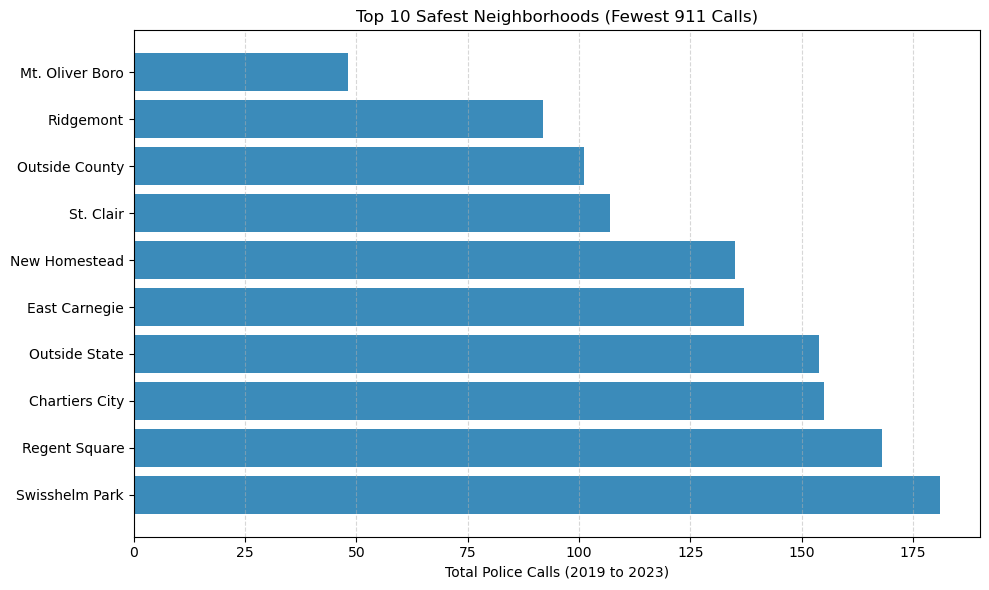

In [35]:
# Step 1: Clean neighborhood names
crime_recent = crime_recent.copy()
crime_recent["INCIDENTNEIGHBORHOOD"] = (
    crime_recent["INCIDENTNEIGHBORHOOD"]
    .astype(str)
    .str.strip()
    .str.title()
)


# Step 2: Manually merge known variants
crime_recent["INCIDENTNEIGHBORHOOD"] = crime_recent["INCIDENTNEIGHBORHOOD"].replace({
    "Strip Dist": "Strip District"
})

# Step 3: Remove unknowns or blanks
crime_recent = crime_recent[
    (crime_recent["INCIDENTNEIGHBORHOOD"] != "") &
    (crime_recent["INCIDENTNEIGHBORHOOD"].str.lower() != "unknown") &
    (crime_recent["INCIDENTNEIGHBORHOOD"].notna())
]

# Step 4: Count police calls by neighborhood
crime_counts = (crime_recent["INCIDENTNEIGHBORHOOD"].value_counts().reset_index())
crime_counts.columns = ["neighborhood", "crime_calls"]

# Step 5: Sort by fewest calls
safest = crime_counts.sort_values("crime_calls").head(10)

# Step 6: Plot the top 10 safest
plt.figure(figsize=(10, 6))
plt.barh(safest["neighborhood"], safest["crime_calls"], color="#3b8bba")
plt.xlabel("Total Police Calls (2019 to 2023)")
plt.title("Top 10 Safest Neighborhoods (Fewest 911 Calls)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Crime Data Analysis (2019–2023)

This chart displays the ten Pittsburgh neighborhoods with the fewest police-reported incidents from 2019 to 2023. A lower number of police calls typically suggests a safer and quieter community.

Neighborhoods like **Mt. Oliver Boro**, **Ridgemont**, and **St. Clair** stood out for having significantly fewer 911 calls over the past several years. These results indicate relatively low crime activity and a peaceful environment in these areas.

In contrast, neighborhoods such as **Chartiers City** and **Swisshelm Park** still made the top 10 but had noticeably higher incident counts compared to others in the group. This shows there's still a range in safety levels, even among the “safest” neighborhoods.

We used the total number of police calls as a direct measure of neighborhood safety, with fewer calls earning a higher normalized safety score. This score is later combined with other metrics to determine each neighborhood’s overall ranking.

In [19]:
# Normalize the crime calls: lower calls = higher score (0 to 1)
# crime_score = 1 - (crime_calls - min) / (max - min)
crime_counts["crime_score"] = 1 - (
    (crime_counts["crime_calls"] - crime_counts["crime_calls"].min()) /
    (crime_counts["crime_calls"].max() - crime_counts["crime_calls"].min())
)

# Preview top neighborhoods with their crime scores
crime_counts.sort_values("crime_score", ascending=False).head(10)

,neighborhood,crime_calls,crime_score
94,Mt. Oliver Boro,48,1.000000
93,Ridgemont,92,0.994991
92,Outside County,101,0.993967
91,St. Clair,107,0.993284
90,New Homestead,135,0.990097
89,East Carnegie,137,0.989869
88,Outside State,154,0.987934
87,Chartiers City,155,0.987820
86,Regent Square,168,0.986340
85,Swisshelm Park,181,0.984861


## Dataset #2: School Enrollment

Here we calculate the total number of public school students enrolled in each neighborhood. Higher enrollment is used as a sign of strong school presence and family engagement in the community.

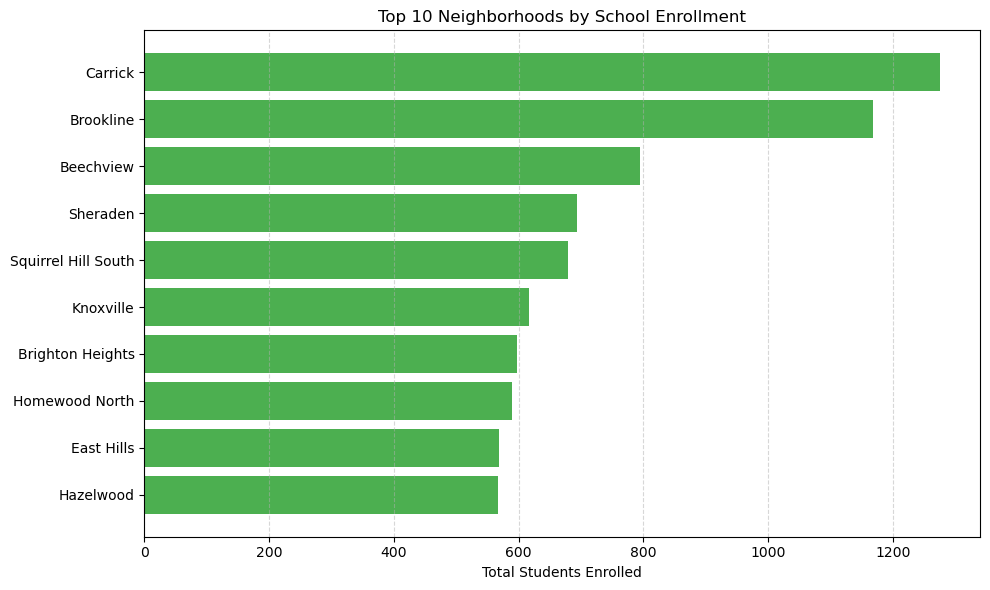

In [20]:
# Step 1: Drop any rows where enrollment is missing
school_df = school_df.dropna(subset=["total_students_enrolled"])

# Step 2: Group by neighborhood and sum total enrollment
school_totals = school_df.groupby("neighborhood")["total_students_enrolled"].sum().reset_index()

# Step 3: Normalize enrollment score (higher = better)
school_totals["school_score"] = (
    (school_totals["total_students_enrolled"] - school_totals["total_students_enrolled"].min()) /
    (school_totals["total_students_enrolled"].max() - school_totals["total_students_enrolled"].min())
)

# Step 4: Sort and take top 10 neighborhoods
top_school = school_totals.sort_values("school_score", ascending=False).head(10)

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.barh(top_school["neighborhood"], top_school["total_students_enrolled"], color="#4caf50")
plt.xlabel("Total Students Enrolled")
plt.title("Top 10 Neighborhoods by School Enrollment")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### School Enrollment Analysis

This chart shows the ten neighborhoods in Pittsburgh with the highest total public school enrollment. A higher number of enrolled students can be a strong indicator of a neighborhood with more families, stronger school presence, and better access to education.

Neighborhoods like **Carrick**, **Brookline**, and **Beechview** stood out with the most students enrolled, suggesting these areas are likely hubs for family life and school activity. Even neighborhoods like **Sheraden** and **Squirrel Hill South**, while lower on the list, still showed high engagement through school presence.

We used total student enrollment as a direct indicator of education access. This raw count was then normalized into a 0–1 **school score** to fairly combine it with other metrics in our final ranking.

In [21]:
# Normalize school enrollment: higher enrollment = higher score (0 to 1)
# school_score = (enrollment - min) / (max - min)
school_totals["school_score"] = (
    (school_totals["total_students_enrolled"] - school_totals["total_students_enrolled"].min()) /
    (school_totals["total_students_enrolled"].max() - school_totals["total_students_enrolled"].min())
)

# Preview top neighborhoods with their school scores
school_totals.sort_values("school_score", ascending=False).head(10)

,neighborhood,total_students_enrolled,school_score
14,Carrick,1276.0,1.000000
12,Brookline,1169.0,0.915348
6,Beechview,794.0,0.618671
62,Sheraden,694.0,0.539557
69,Squirrel Hill South,679.0,0.527690
38,Knoxville,616.0,0.477848
11,Brighton Heights,598.0,0.463608
35,Homewood North,589.0,0.456487
23,East Hills,569.0,0.440665
33,Hazelwood,567.0,0.439082


## Dataset #3: Vacancy Rate (Neighborhood Stability)

Here we calculate the percentage of vacant homes in each neighborhood using data from the Pittsburgh Neighborhood Profiles. A lower vacancy rate is used as a sign of greater housing stability and long-term residency, both of which are often important for family-friendly communities.

Neighborhoods with fewer vacant homes are typically more desirable and indicate stronger neighborhood investment and consistency over time. High vacancy, on the other hand, can suggest instability or limited housing demand.

We used the vacancy percentage as a direct measure of neighborhood stability, and normalized it into a 0–1 **vacancy score**, where lower vacancy leads to a higher score.


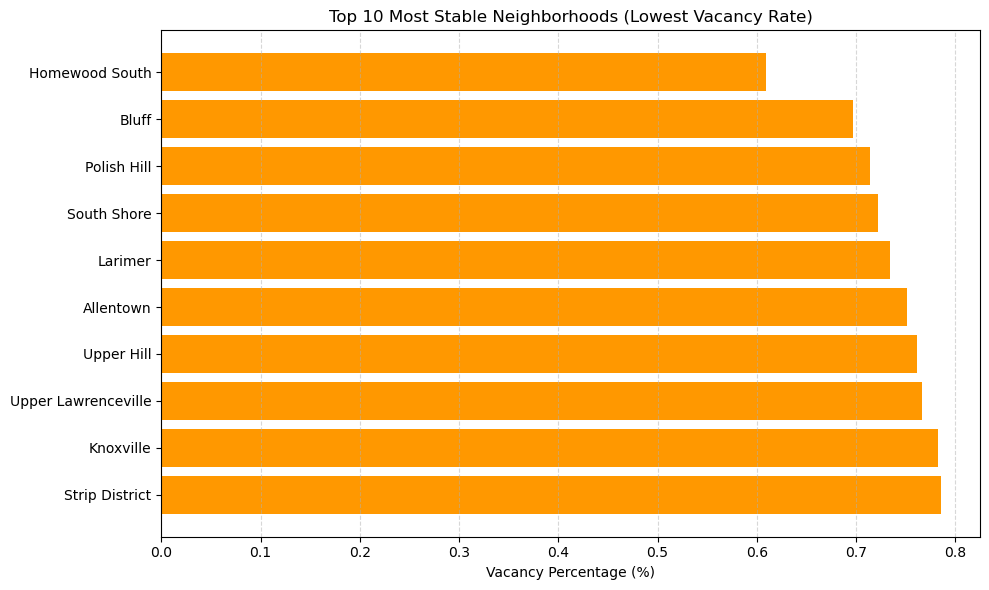

In [22]:
# Step 1: Filter for only neighborhoods (exclude non-neighborhood entries)
vacancy_neigh = vacancy_df[vacancy_df["GeographyType"] == "neighborhood"]

# Step 2: Select neighborhood name and 2022 vacancy percentage
vacancy_data = vacancy_neigh[["NeighborhoodGroup", "Var_2022_vacancy_Per_2"]].copy()
vacancy_data.columns = ["neighborhood", "vacancy_percent"]

# Step 3: Drop missing values
vacancy_data = vacancy_data.dropna()

# Step 4: Sort to find neighborhoods with the lowest vacancy rates
lowest_vacancy = vacancy_data.sort_values("vacancy_percent").head(10)

vacancy_data["vacancy_rate"] = vacancy_data["vacant_housing_units"] / vacancy_data["total_housing_units"]


# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.barh(lowest_vacancy["neighborhood"], lowest_vacancy["vacancy_percent"], color="#ff9800")
plt.xlabel("Vacancy Percentage (%)")
plt.title("Top 10 Most Stable Neighborhoods (Lowest Vacancy Rate)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Vacancy Rate Analysis

This chart shows the ten neighborhoods in Pittsburgh with the lowest housing vacancy percentages, which we used as a sign of neighborhood stability. A lower vacancy rate suggests that more homes are occupied and the area has a stronger sense of community, which can be appealing for families.

Neighborhoods like **Homewood South**, **Bluff**, and **Polish Hill** had the fewest vacant homes, indicating they are more stable and possibly more desirable for long-term residency. These areas may reflect stronger community investment and higher demand for housing.

We used the vacancy percentage as a direct indicator of housing stability. This raw value was then normalized into a 0–1 **vacancy score**, where lower vacancy resulted in a higher score. This allowed us to fairly combine it with other metrics in our final ranking.

In [23]:
# Normalize vacancy rate: lower vacancy = higher score (0 to 1)
# vacancy_score = 1 - (vacancy_percent - min) / (max - min)
vacancy_data["vacancy_score"] = 1 - (
    (vacancy_data["vacancy_percent"] - vacancy_data["vacancy_percent"].min()) /
    (vacancy_data["vacancy_percent"].max() - vacancy_data["vacancy_percent"].min())
)

# Preview top neighborhoods with their vacancy scores
vacancy_data.sort_values("vacancy_score", ascending=False).head(10)

,neighborhood,vacancy_percent,vacancy_score
36,Homewood South,0.609091,1.000000
14,Bluff,0.696970,0.757686
54,Polish Hill,0.714120,0.710396
57,South Shore,0.722222,0.688056
38,Larimer,0.733990,0.655608
7,Allentown,0.751356,0.607725
68,Upper Hill,0.761208,0.580559
69,Upper Lawrenceville,0.766846,0.565011
37,Knoxville,0.782535,0.521751
64,Strip District,0.785714,0.512985


## Best Neighborhood Final Score: Combining All Metrics

Now that we’ve calculated individual scores for each neighborhood based on crime, school enrollment, and vacancy rate, we combine them to create a single, overall score.

Each score was normalized between 0 and 1 to ensure fairness, where **higher values always indicate better performance** (i.e., safer, more stable, or more family-friendly). The final score is calculated as the average of the three individual scores:

final_score = (crime_score + school_score + vacancy_score) / 3


This final score allows us to rank all Pittsburgh neighborhoods and determine which one offers the most balanced combination of safety, education access, and housing stability, helping us identify the overall **best neighborhood for families**.

In [28]:
# Step 1: Merge all three score tables on "neighborhood"
final_df = crime_counts[["neighborhood", "crime_score"]].merge(
    school_totals[["neighborhood", "school_score"]],
    on="neighborhood", how="inner"
).merge(
    vacancy_data[["neighborhood", "vacancy_score"]],
    on="neighborhood", how="inner"
)

# Step 2: Calculate the average of the three scores
final_df["final_score"] = final_df[["crime_score", "school_score", "vacancy_score"]].mean(axis=1)

# Step 3: Sort and display top 10 neighborhoods
top_final = final_df.sort_values("final_score", ascending=False).head(10)
top_final

,neighborhood,crime_score,school_score,vacancy_score,final_score
8,Homewood South,0.710188,0.367880,1.000000,0.692689
1,Carrick,0.479681,1.000000,0.306895,0.595525
13,Knoxville,0.758224,0.477848,0.521751,0.585941
16,East Hills,0.793056,0.440665,0.476582,0.570101
25,Larimer,0.847923,0.193038,0.655608,0.565523
43,Polish Hill,0.955606,0.017405,0.710396,0.561136
3,Brookline,0.623108,0.915348,0.128677,0.555711
15,Allentown,0.789755,0.215190,0.607725,0.537557
36,Upper Hill,0.924189,0.104430,0.580559,0.536393
10,Beechview,0.726010,0.618671,0.234430,0.526370


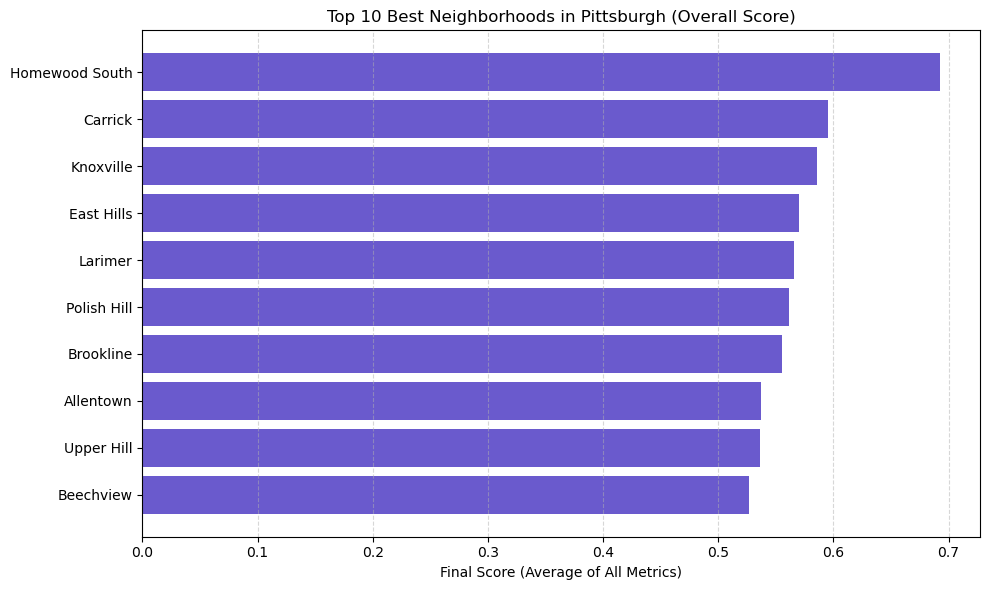

In [26]:
# Plot top 10 neighborhoods by final score
plt.figure(figsize=(10, 6))
plt.barh(top_final["neighborhood"], top_final["final_score"], color="#6a5acd")
plt.xlabel("Final Score (Average of All Metrics)")
plt.title("Top 10 Best Neighborhoods in Pittsburgh (Overall Score)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

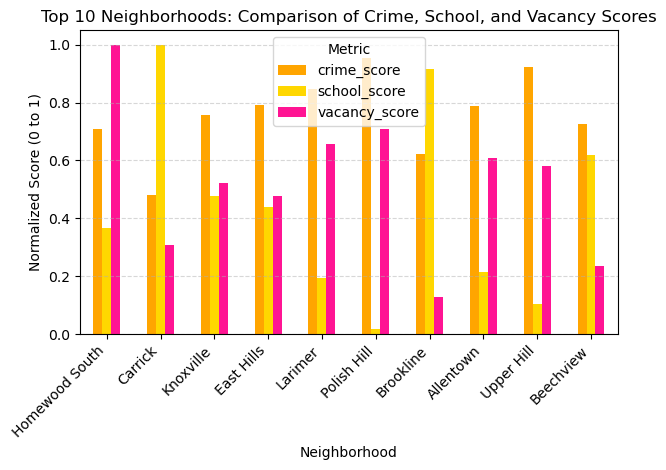

In [33]:
# Step 1: Sort final_df by final_score and select the top 10 neighborhoods
top10_df = final_df.sort_values("final_score", ascending=False).head(10)

# Step 2: Prepare the subset DataFrame with the metric scores
score_plot_top10 = top10_df[["neighborhood", "crime_score", "school_score", "vacancy_score"]]
score_plot_top10.set_index("neighborhood", inplace=True)

# Step 3: Plot grouped bar chart
plt.figure(figsize=(14, 7))
score_plot_top10.plot(kind="bar", color=["orange", "gold", "deeppink"])
plt.title("Top 10 Neighborhoods: Comparison of Crime, School, and Vacancy Scores")
plt.ylabel("Normalized Score (0 to 1)")
plt.xlabel("Neighborhood")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metric")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

After calculating scores for each Pittsburgh neighborhood based on crime rate, school enrollment, and housing vacancy, we combined them into a final average score. Each of the three metrics was normalized on a 0 to 1 scale so that all categories were weighted equally. This gave us a fair way to rank neighborhoods using real, measurable data.

Based on our final combined score, **Homewood South** came out as the best overall neighborhood for families. It had a strong balance across all three categories, especially excelling in housing stability with the **lowest vacancy rate** in the city. While it did not rank first in school enrollment or crime score, its consistent performance across all areas led to the highest average.

This shows that a neighborhood doesn’t have to be number one in everything to be the best overall, consistency across important categories can make a big difference. Other neighborhoods like **Carrick** and **Knoxville** also scored well in some areas but were slightly less balanced in others.

# Conclusion

After analyzing data from three key areas crime, school enrollment, and vacancy rates, we found that Homewood South ranked as the best neighborhood in Pittsburgh for families. It stood out the most in housing stability, with the lowest vacancy rate overall, and also performed strongly in safety, with relatively few police-reported incidents. While it wasn’t the top scoring area in school enrollment, it still did well enough to keep its overall average high.

What made Homewood South come out on top wasn’t just being #1 in one category, but being consistently solid across all three. Other neighborhoods like Carrick or Knoxville scored high in one area but didn’t have the same balance across the board.

This project helped us realize that the "best" neighborhood depends on what you value most, whether that’s safety, good schools, or stable housing. By combining all of those into one score, we got a more complete and fair picture. It also showed us how real-world data can back up or challenge our assumptions about a place. Sometimes a neighborhood that seems great personally might not perform well on paper, and sometimes areas that get overlooked can actually be some of the most well-rounded.

### Individual Reflections

**Josh:**  
My favorite neighborhood is South Oakland. I like it because it’s busy, walkable, and always has something going on. Even though it didn’t score highest in our rankings, I still prefer it because of the energy and student life. This project showed me how data doesn’t always reflect the vibe or personality of a place, but it does help you notice strengths and weaknesses you might miss otherwise.

**Nabeel:**  
My favorite neighborhood is the Strip District. It’s one of the most unique areas in Pittsburgh with its markets, restaurants, and street energy. While it didn’t rank number one overall, it did perform really well in safety and had a strong presence overall. Working on this project helped me look at neighborhoods differently, not just based on what’s fun or familiar, but based on facts. I learned how objective data can help you evaluate places fairly, even if they’re not your personal favorite.